<h2>Project-2 Solution

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf

ImportError: DLL load failed while importing _cext: The specified module could not be found.

In [2]:
# import csv file
data = pd.read_csv('project 2 data.csv', encoding= 'unicode_escape')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      145 non-null    object
 1   Item      145 non-null    object
 2   Amount    145 non-null    int64 
 3   Category  144 non-null    object
 4   Time      145 non-null    object
 5   day       145 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.9+ KB


In [4]:
data.isnull().any()
data.isnull().any().sum()

1

In [5]:
data.dropna(inplace=True)

In [7]:
data.head(10)

,Date,Item,Amount,Category,Time,day
0,1/3/2023,chai,7,alone,7:00,Wednesday
1,1/3/2023,chai,20,friend,10:00,Wednesday
2,1/3/2023,juice,15,friend,13:00,Wednesday
3,1/3/2023,rikshow,12,alone,14:00,Wednesday
4,1/3/2023,coffee,12,alone,15:00,Wednesday
5,1/3/2023,chai with snaks,25,alone,17:00,Wednesday
6,1/3/2023,coldrink,10,alone,21:30,Wednesday
7,1/3/2023,others,10,alone,12:00,Wednesday
8,2/3/2023,chai,7,alone,7:00,Thursday
9,2/3/2023,juice,15,friend,13:00,Thursday


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 144
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      144 non-null    object
 1   Item      144 non-null    object
 2   Amount    144 non-null    int64 
 3   Category  144 non-null    object
 4   Time      144 non-null    object
 5   day       144 non-null    object
dtypes: int64(1), object(5)
memory usage: 7.9+ KB


In [10]:
data.isnull().any()

Date        False
Item        False
Amount      False
Category    False
Time        False
day         False
dtype: bool

<h2>Analytical Question-1: Total Expenditure:  What is the total expenditure over  the given period? </h2>

In [9]:
total_expenditure = data["Amount"].sum()
print(f"Total Expenditure: ${total_expenditure:.2f}")

Total Expenditure: $4599.00


<h3>Analytical Question-2: Expenditure by Category:  What is the total expenditure  for each category? </h3>

In [10]:
expenditure_by_category = data.groupby("Category")["Amount"].sum()
print("\nExpenditure by Category:")
print(expenditure_by_category)


Expenditure by Category:
Category
alone     2710
friend    1889
Name: Amount, dtype: int64


<h3>Analytical Question-3: Average Daily Expenditure:  What is the average expenditure  per day? </h3>

In [11]:
num_days = data["Date"].nunique()
average_daily_expenditure = total_expenditure / num_days
print(f"\nAverage Daily Expenditure: ${average_daily_expenditure:.2f}")


Average Daily Expenditure: $148.35


<h3>Analytical Question-4:Top Spending Items:  What are the top 5 items by total  expenditure? </h3>

In [12]:
top_items = data.groupby("Item")["Amount"].sum().nlargest(5)
print("\nTop 5 Spending Items:")
print(top_items)


Top 5 Spending Items:
Item
chai with snaks    1080
biryani             580
shoe                500
wifi                350
others              325
Name: Amount, dtype: int64


<h3>Analytical Question-5: Expenditure by Day:  How does expenditure vary by day  of the week? </h3>

In [13]:
expenditure_by_day = data.groupby("day")["Amount"].sum()
print("\nExpenditure by Day:")
print(expenditure_by_day)


Expenditure by Day:
day
Friday        356
Monday        670
Saturday      402
Sunday       1267
Thursday      493
Tuesday       691
Wednesday     720
Name: Amount, dtype: int64


<h3>Analytical Question-6:Time of Day Analysis:  What are the peak times for  spending? </h3>


In [15]:
# Calculate total expenditure for each time slot
expenditure_by_time = data.groupby('Time')['Amount'].sum().reset_index()

# Sort by total expenditure in descending order to find peak times
peak_times = expenditure_by_time.sort_values(by='Amount', ascending=False)

print(peak_times)

           Time  Amount
16        17:30     625
27         9:00     545
5         12:00     375
2         10:30     350
21        21:00     310
17        18:00     302
11        15:00     217
1         10:00     210
7         13:00     202
13        16:00     200
25        23:30     200
14        17:00     169
8         14:00     156
18        19:00     144
4         11:00      85
22        21:30      75
20        20:00      74
26         7:00      72
28         9:30      60
24        22:40      50
3         10:32      40
12        15:30      29
19        19:30      20
15        17:20      20
9         14:10      20
23        22:30      15
10        14:30      12
6         12:30      12
0   1.083333333      10


<h3>Analytical Question-7: Expenditure by Social Context:  How does spending differ  when alone versus with a 
friend?</h3>

In [23]:
expenditure_by_social_context = data.groupby("Category")["Amount"].sum()
print("\nExpenditure by Social Context:")
print(expenditure_by_social_context)


Expenditure by Social Context:
Category
alone     2710
friend    1889
Name: Amount, dtype: int64


<h3>Analytical Question-8: Item Frequency:  Which items are purchased most frequently? </h3>

In [24]:
item_frequency = data["Item"].value_counts()
print("\nItem Frequency:")
print(item_frequency)


Item Frequency:
Item
chai with snaks    48
chai               21
others             16
coldrink           11
coffee             10
juice               9
rikshow             4
biryani             4
idli                3
samosa              3
chicken             3
ice cream           2
wifi                1
freanky             1
petrol              1
recharge            1
shoe                1
pizza               1
chass               1
faluda              1
choclate            1
chiness bhel        1
maggi               1
Name: count, dtype: int64


In [8]:
# 9. Expenditure Trends (monthly)
data["Month"] = pd.to_datetime(data["Date"]).dt.month
monthly_trends = data.groupby("Month")["Amount"].sum()
print("\nExpenditure Trends (Monthly):")
print(monthly_trends)

ValueError: time data "13/3/2023" doesn't match format "%m/%d/%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [7]:

# 6. Time of Day Analysis (assuming 'Time' is in 24-hour format)
data["Hour"] = pd.to_datetime(data["Time"]).dt.hour
peak_times = data.groupby("Hour")["Amount"].sum()
print("\nPeak Times for Spending:")
print(peak_times)


# 9. Expenditure Trends (monthly)
data["Month"] = pd.to_datetime(data["Date"]).dt.month
monthly_trends = data.groupby("Month")["Amount"].sum()
print("\nExpenditure Trends (Monthly):")
print(monthly_trends)

# 10. Category vs. Time
category_vs_time = data.groupby(["Category", "Hour"])["Amount"].sum()
print("\nCategory vs. Time:")
print(category_vs_time)


C:\Users\IT BD\AppData\Local\Temp\ipykernel_2540\2669341189.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Hour"] = pd.to_datetime(data["Time"]).dt.hour


ValueError: Given date string "1.083333333" not likely a datetime, at position 45

<h2>Visualization</h2>

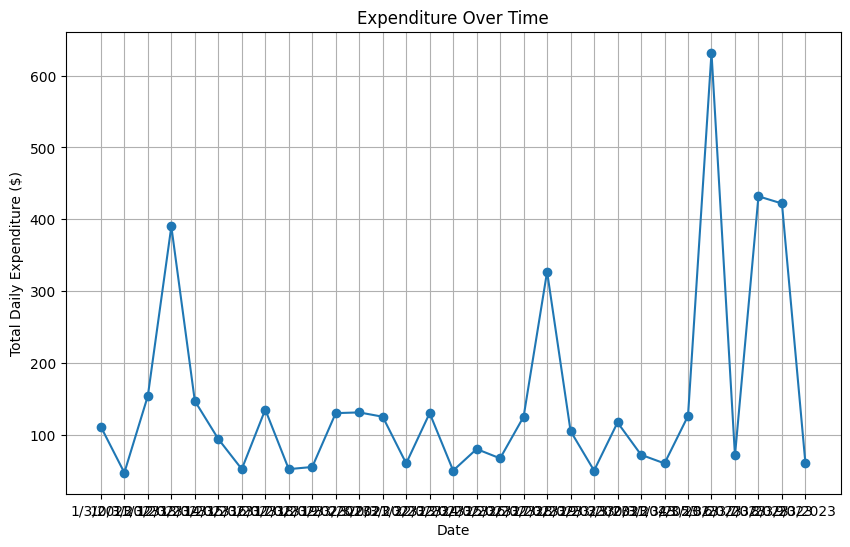

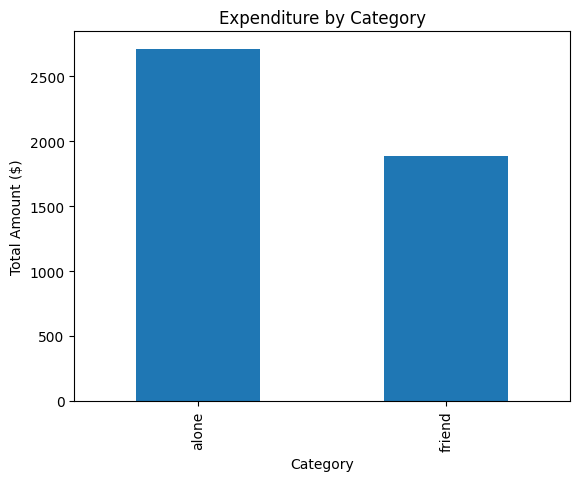

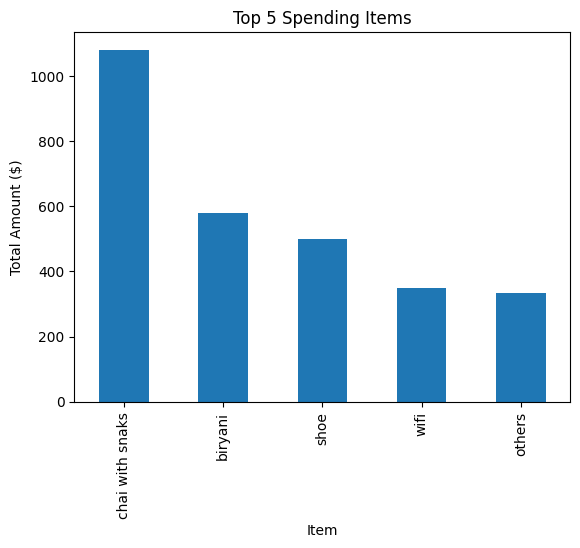

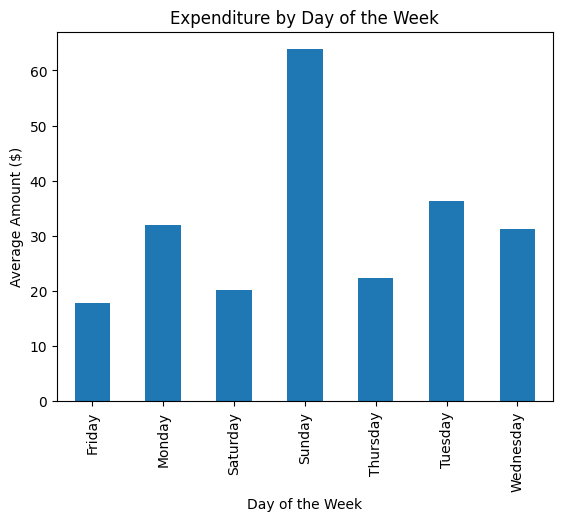

KeyError: 'Hour'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the CSV file
data = pd.read_csv("project 2 data.csv")

# 1. Expenditure Over Time (Line Chart)
daily_expenditure = data.groupby("Date")["Amount"].sum()
plt.figure(figsize=(10, 6))
plt.plot(daily_expenditure.index, daily_expenditure.values, marker="o")
plt.xlabel("Date")
plt.ylabel("Total Daily Expenditure ($)")
plt.title("Expenditure Over Time")
plt.grid(True)
plt.show()

# 2. Expenditure by Category (Bar Chart)
expenditure_by_category = data.groupby("Category")["Amount"].sum()
expenditure_by_category.plot(kind="bar", xlabel="Category", ylabel="Total Amount ($)", title="Expenditure by Category")
plt.show()

# 3. Top Spending Items (Bar Chart)
top_items = data.groupby("Item")["Amount"].sum().nlargest(5)
top_items.plot(kind="bar", xlabel="Item", ylabel="Total Amount ($)", title="Top 5 Spending Items")
plt.show()

# 4. Expenditure by Day of the Week (Bar Chart)
average_expenditure_by_day = data.groupby("day")["Amount"].mean()
average_expenditure_by_day.plot(kind="bar", xlabel="Day of the Week", ylabel="Average Amount ($)", title="Expenditure by Day of the Week")
plt.show()

# 5. Time of Day Analysis (Heatmap)
hourly_expenditure = data.pivot_table(index="Hour", columns="day", values="Amount", aggfunc="sum")
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_expenditure, cmap="YlGnBu", annot=True, fmt=".0f")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.title("Expenditure by Time of Day and Day of the Week")
plt.show()

# 6. Category Breakdown (Pie Chart)
category_proportion = expenditure_by_category / expenditure_by_category.sum()
category_proportion.plot(kind="pie", autopct="%1.1f%%", title="Category Breakdown")
plt.ylabel("")
plt.show()

# 7. Expenditure Distribution (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(data["Amount"], bins=20, edgecolor="black")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Frequency")
plt.title("Expenditure Distribution")
plt.grid(True)
plt.show()

# 8. Expenditure by Social Context (Bar Chart)
expenditure_by_social_context = data.groupby("Category")["Amount"].sum()
expenditure_by_social_context.plot(kind="bar", xlabel="Category", ylabel="Total Amount ($)", title="Expenditure by Social Context")
plt.show()

# 9. Item Purchase Frequency (Bar Chart)
item_frequency = data["Item"].value_counts()
item_frequency.plot(kind="bar", xlabel="Item", ylabel="Frequency", title="Item Purchase Frequency")
plt.show()

# 10. Daily Spending Trends (Line Chart)
